In [3]:
import numpy as np
import pandas as pd
%precision 3

'%.3f'

In [6]:
df = pd.read_csv('../ju/data/ch2_scores_em.csv', index_col='student number')

In [7]:
en_scores = np.array(df['english'])[:10]
ma_scores= np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english' :en_scores,
                          'mathematics':ma_scores},
                         index=pd.Index(['A','B','C','D','E','F','G','H','I','J'],
                                        name = 'student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [9]:
summary_df = scores_df.copy()
summary_df['english_deviation'] =\
    summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] =\
    summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] =\
    summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [10]:
summary_df['product of deviations'].mean()
#이걸로 영어점수와 수학점수는 양의 상관관계임을 확인.

62.800

In [11]:
cov_mat = np.cov(en_scores, ma_scores, ddof = 0)
cov_mat
#공분산 구하기_ 근데 반환값은 공분산행렬이라 부르는 행렬임

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [12]:
cov_mat[0,1], cov_mat[1,0] #여기 노이해

(62.800, 62.800)

In [13]:
#동일한 변수들의 공분산 = 해당 변수의 분산
cov_mat[0,0], cov_mat[1,1]

(86.000, 68.440)

In [14]:
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)
#영어,수학 분산 계산하기. 

(86.000, 68.440)

In [15]:
#상관계수_반드시 -1~1사이의 값.무상관이면 0
np.cov(en_scores, ma_scores, ddof=0)[0,1]/\
    (np.std(en_scores) * np.std(ma_scores))
#\ ---> 줄바꿈이었다....
#std 표준편차 계산 함수

0.819

In [16]:
#numpy는 상관계수 corrcoef함수로 구할수있다.
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [17]:
scores_df.corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

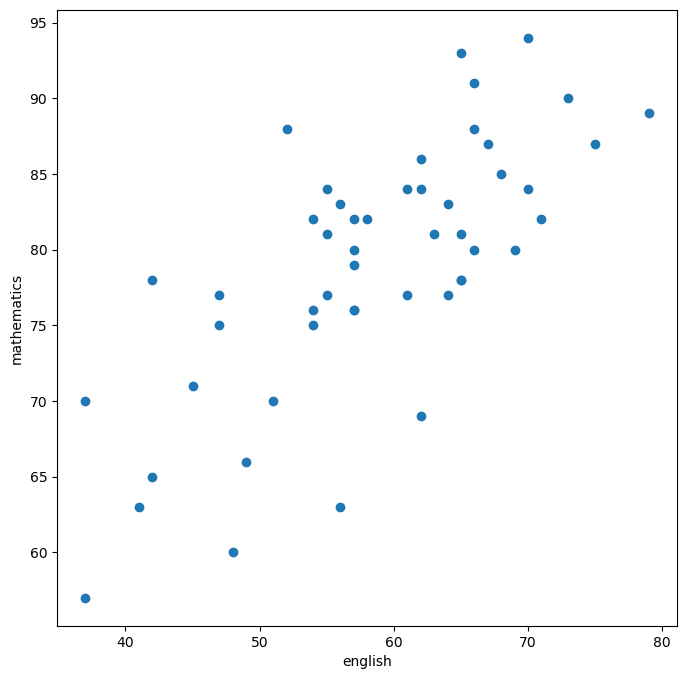

In [24]:
#matplotlib에서 scotter메서드 이용해서 산점도 그리기
english_scores=np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()
plt.close()
#산점도 이상하게 2개 나와서 클로즈해버림.

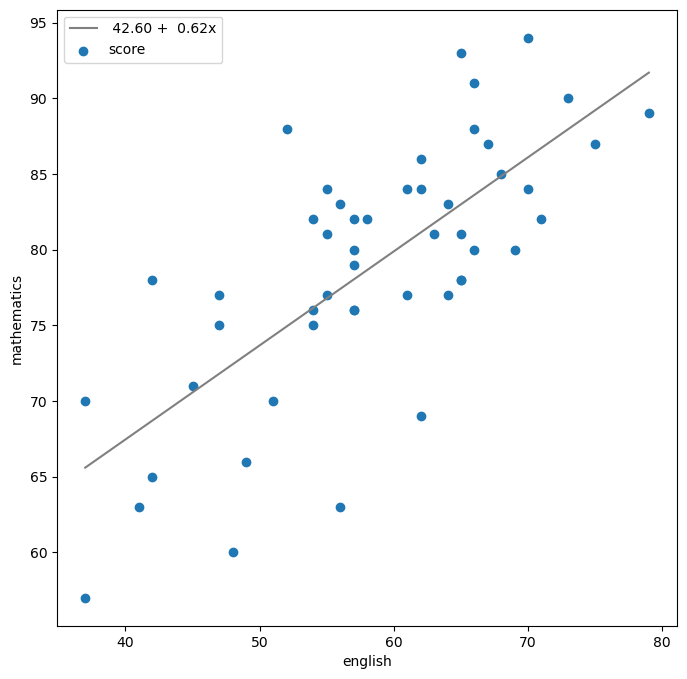

In [28]:
#회귀직선 = 데이터의 산점도 위에 최소제곱법으로 구한 직선을 그려서, 두 변수 사이의 선형적 관계를 시각적으로 보여줌.
poly_fit = np.polyfit(english_scores, math_scores, 1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(english_scores.min(), english_scores.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]: .2f} + {poly_fit[0]: .2f}x')
ax.scatter(english_scores, math_scores, label = 'score')
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

#범례표시
ax.legend(loc = 'upper left')

plt.show()

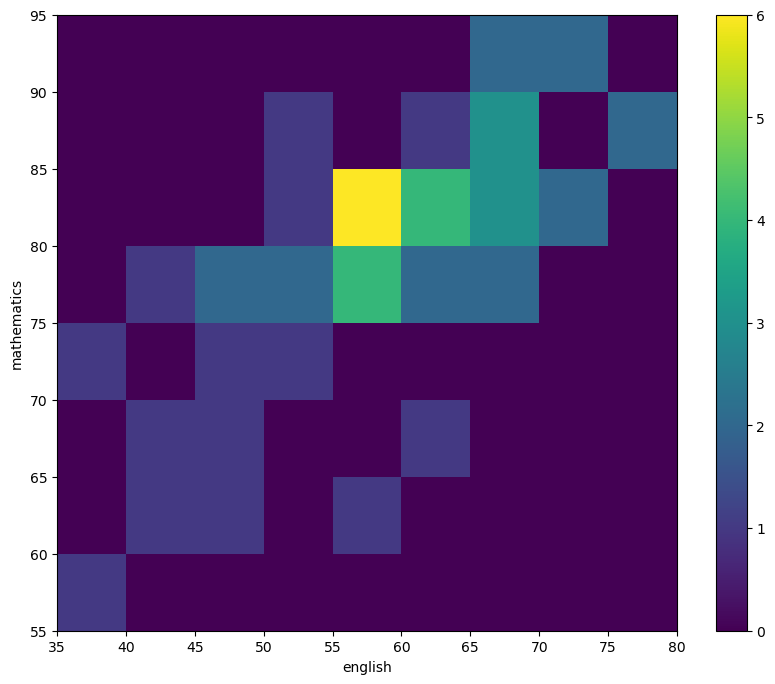

In [31]:
#히트맵=색을 이용해 표현할 수 있는 그래프. his2d메서드로 작성. 색이 진한 영역일수록 많은 학생이 분포되어있음을 나타냄.

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores,
              bins=[9,8], range=[(35,80), (55,95)] )
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax = ax)
plt.show()


In [38]:
#3.3 앤스컴의 예_ 데이터 분석 전 시각화의 중요성을 알려주는 ......
#동일한 지표 가지고도 그림으로 표현하면 달라진다는 걸 알려고하는거임..

anscombe_data = np.load('./data/ch3_anscombe.npy')
print(anscombe_data.shape)
anscombe_data[0]


(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [40]:
stats_df = pd.DataFrame(index=['X_mean', 'X_variance','Y_mean','Y_variance','X&Y_correlation','X&Y_regression line'])

for i, data in enumerate(anscombe_data):
    dataX = data[:,0]
    dataY = data[:,1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i+1}'] =\
        [f'{np.mean(dataX):.2f}',
        f'{np.var(dataX):.2f}',
        f'{np.mean(dataY):.2f}',
        f'{np.var(dataY):.2f}',
        f'{np.corrcoef(dataX, dataY)[0,1]:.2f}',
        f'{poly_fit[1]:.2f}+ {poly_fit[0]:.2f}x']
stats_df   

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+ 0.50x,3.00+ 0.50x,3.00+ 0.50x,3.00+ 0.50x


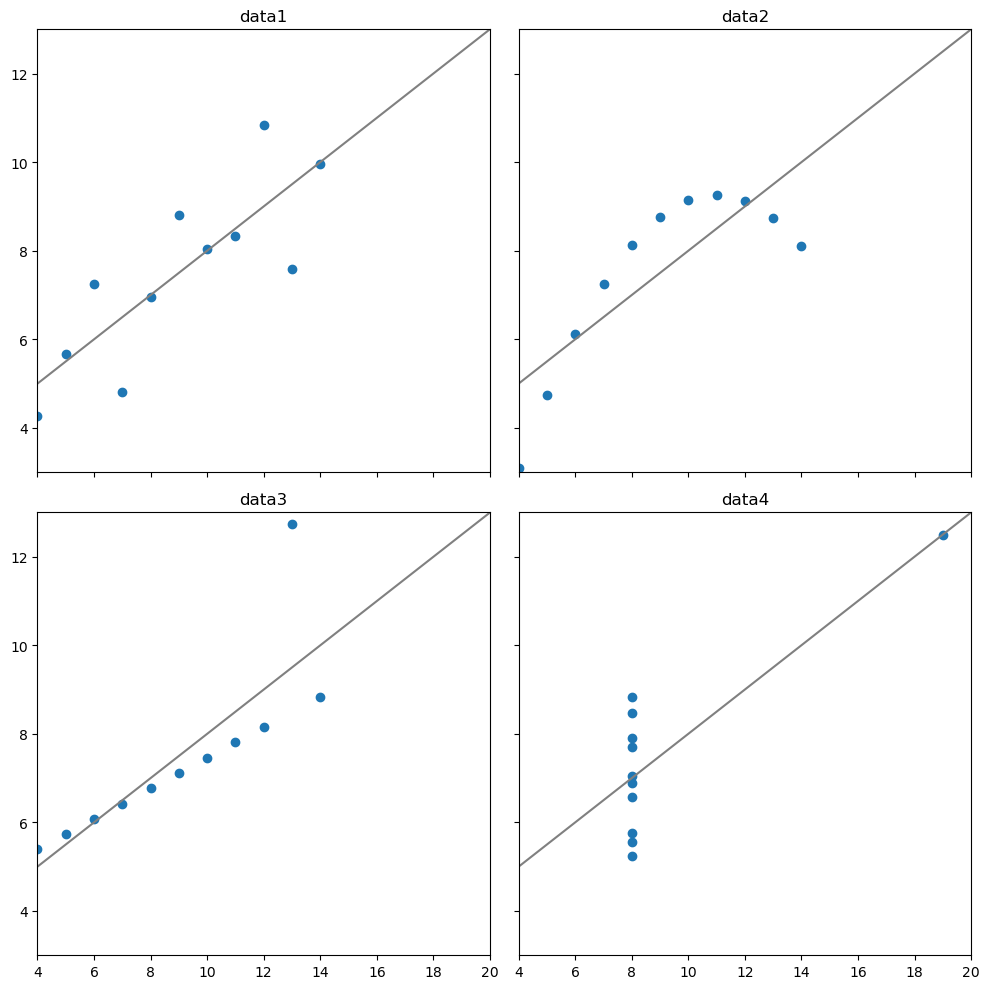

In [41]:
# 그래프를 그리기 위한 영역을 2x2개 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), 
                         sharex=True, sharey=True)

xs = np.linspace(0, 30, 100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0], data[:,1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    
    # 그리는 영역을 선택
    ax = axes[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    
    # 타이틀을 부여
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs, ys, color='gray')

# 그래프 사이의 간격을 좁힘
plt.tight_layout()
plt.show()


In [43]:
#4장 추측통계_일부 데이터로부터 전체의 통계적 성질을 추측하는 방식
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [44]:
df = pd.read_csv('./data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])

In [45]:
#무작위추출_표본편향 없애려고
#복원추출_여러차례 동일 표본 추출O <-> 비복원추출
np.random.choice([1,2,3],3)

array([3, 2, 2])

In [46]:
np.random.choice([1,2,3],3,replace=False)


array([1, 3, 2])

In [47]:
np.random.seed(0)
np.random.choice([1,2,3],3)
#난수 seed 이제부터 발생하는 난수의 근원이 되는 숫자로, 정하면 매번 동일한 난수를 얻을 수 있다.

array([1, 2, 1])

In [48]:
np.random.seed(0)
sample = np.random.choice(scores, 20)
sample.mean()

70.400

In [49]:
scores.mean()

69.530

In [50]:
for i in range(5):
    sample = np.random.choice(scores,20)
    print(f'{i+1}번째 무작위추출로 얻은 표본평균', sample.mean())

1번째 무작위추출로 얻은 표본평균 72.45
2번째 무작위추출로 얻은 표본평균 63.7
3번째 무작위추출로 얻은 표본평균 66.05
4번째 무작위추출로 얻은 표본평균 71.7
5번째 무작위추출로 얻은 표본평균 74.15


In [53]:
#이러한 불확정성을 수반한 현상을 해결하기 위해 확률모형 사용
#시행_확률변수의 결과를 관측하는 것
#근원사건_더 세부적으로 분석할 수 없는 사건
#상호배반_각 사건이 동시에는 일어날 수 없다
dice = [1,2,3,4,5,6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]


In [54]:
np.random.choice(dice, p=prob)

np.int64(1)

In [55]:
num_trial=100
sample=np.random.choice(dice, num_trial, p=prob)
sample

array([4, 6, 4, 5, 5, 6, 6, 3, 5, 6, 5, 6, 6, 2, 3, 1, 6, 5, 6, 3, 4, 5,
       3, 4, 3, 5, 5, 4, 4, 6, 4, 6, 5, 6, 5, 4, 6, 2, 6, 4, 5, 3, 4, 6,
       5, 5, 5, 3, 4, 5, 4, 4, 6, 4, 4, 6, 6, 2, 2, 4, 5, 1, 6, 4, 3, 2,
       2, 6, 3, 5, 4, 2, 4, 4, 6, 6, 1, 5, 3, 6, 6, 4, 2, 1, 6, 4, 4, 2,
       4, 1, 3, 6, 6, 6, 4, 5, 4, 3, 3, 4])

In [56]:
#도수분포표 작성해보기
freq,_=np.histogram(sample, bins=6, range=(1,7))
pd.DataFrame({'frequency':freq,
              'relative frequency':freq / num_trial},
             index = pd.Index(np.arange(1,7), name = 'dice'))

,frequency,relative frequency
dice,,
1,5,0.05
2,9,0.09
3,13,0.13
4,27,0.27
5,19,0.19
6,27,0.27


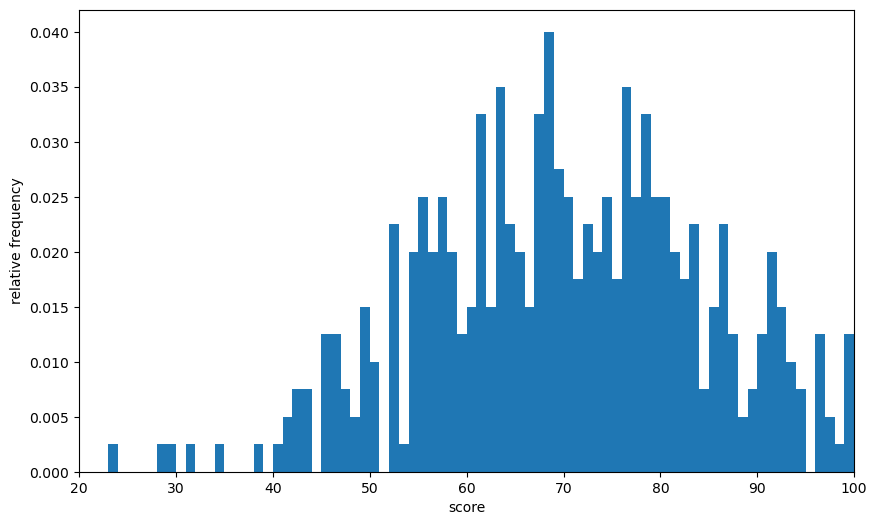

In [57]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

In [58]:
np.random.choice(scores)

np.int64(86)

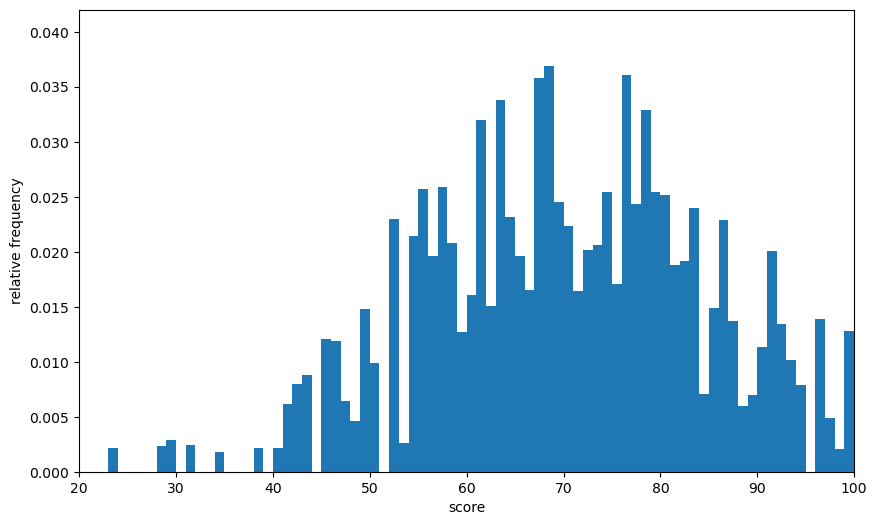

In [59]:
sample = np.random.choice(scores, 10000)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

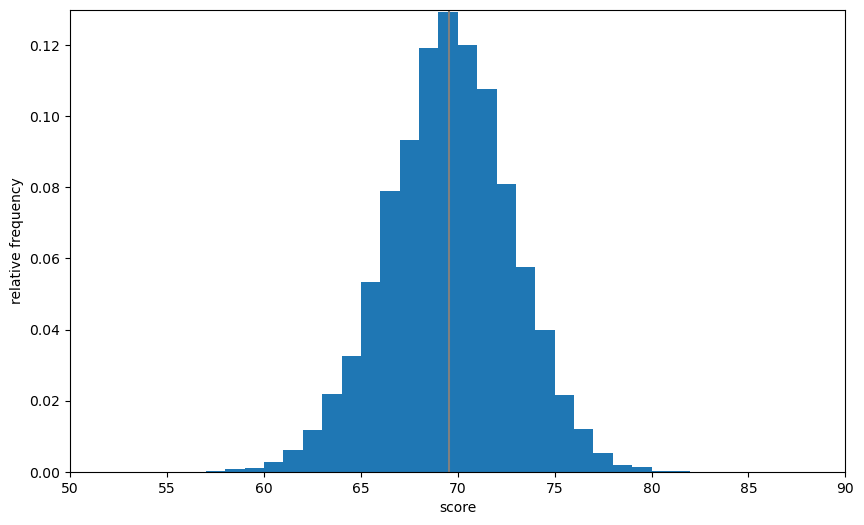

In [60]:
sample_means = [np.random.choice(scores, 20).mean()
                for _ in range(10000)]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0, 100), density=True)
# 모평균을 세로선으로 표시
ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()